## Learning Objectives

This should be another short one, but we need to go ahead and do this. I have shown you how to transform qualitative features into quantitative ones, and this is quite useful for computing summary statistics, doing bootstrap and making visualizations, but now we are starting to be interested in prediction. For this we will need to do a slightly different feature transformaiton for qualitative variables and we will need to do some cleaning of quantitative variables too. These steps are outlines below:

1. Dummy variable drop one
2. Impute or drop Nans
3. Standardization

Again, before I go on, the above steps are not a complete list of what you could do and are not always needed, which is why I'll try to give some intuition into why we do them and what else can be done:

#### Dummy Variable drop

If you remember from a couple of lessons ago we talked about transforming qualitative variables into quantitative ones by creating an equal number of columns as there were qualitative values. This is a good approach for visualization or trying to come up with confidence intervals for specific features under different conditions, but is not effective for machine learning.

In most machine learning algorithms you will need to remove correlated features as they can prove detramental to the results. 

1. For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

2. Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

You can determine which features might be highly correlated by using a correlation matrix, let's use one below:

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/billionaires.csv')



In [5]:
print(df.age)

0       -1
1       34
2       59
3       61
4       -1
5       -1
6       -1
7       -1
8       66
9       -1
10      12
11      63
12      -1
13      -1
14      -1
15      -1
16      -1
17      47
18      -1
19      -1
20      59
21      -1
22      82
23      57
24      -1
25      69
26      76
27      75
28      -1
29      -1
        ..
2584    52
2585    45
2586    38
2587    77
2588    36
2589    70
2590    47
2591    53
2592    54
2593    55
2594    62
2595    59
2596    50
2597    61
2598    67
2599    48
2600    42
2601    45
2602    50
2603    56
2604    48
2605    43
2606    56
2607    48
2608    54
2609    49
2610    48
2611    45
2612    68
2613    57
Name: age, Length: 2614, dtype: int64


In [6]:
del df['was founder']
del df['inherited']
del df['from emerging']

df.age.replace(-1, np.NaN, inplace=True) # Replace all occurances of -1 with a NaN value
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

# DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')

In [7]:
print(df.age)

0        NaN
1       34.0
2       59.0
3       61.0
4        NaN
5        NaN
6        NaN
7        NaN
8       66.0
9        NaN
10      12.0
11      63.0
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17      47.0
18       NaN
19       NaN
20      59.0
21       NaN
22      82.0
23      57.0
24       NaN
25      69.0
26      76.0
27      75.0
28       NaN
29       NaN
        ... 
2584    52.0
2585    45.0
2586    38.0
2587    77.0
2588    36.0
2589    70.0
2590    47.0
2591    53.0
2592    54.0
2593    55.0
2594    62.0
2595    59.0
2596    50.0
2597    61.0
2598    67.0
2599    48.0
2600    42.0
2601    45.0
2602    50.0
2603    56.0
2604    48.0
2605    43.0
2606    56.0
2607    48.0
2608    54.0
2609    49.0
2610    48.0
2611    45.0
2612    68.0
2613    57.0
Name: age, Length: 2614, dtype: float64


In [8]:
df[['gdp', 'worth in billions']].corr()

,gdp,worth in billions
gdp,1.000000,0.047724
worth in billions,0.047724,1.000000


So notice that the above are not correlated features so you will generally not have to worry about them. That being said, the correlation matrix above will only measure linear correlation between two entities, so you will need to use your head to figure out what is correlated sometimes. And this is all too true when talking about dummy variables.

Let's say you have a qualitative feature that is red, green and blue. If you make three columns, these three columns will be completely dependent on each other. Why? Because if I know that the red column is 0 and the green column is 0, then I am completely assured that the blue column is 1. In fact if I know what the green and the red columns are, I will always know what the blue column is. Thus the columns all together are correlated and redundent. We can solve this issue easily by dropping one of the dummy variable columns.

I'll show you a quick way to do this below:

In [9]:
pd.get_dummies(df, columns=['wealth.type'], drop_first=True).head()

,age,category,citizenship,company.name,company.type,country code,founded,gdp,gender,industry,...,region,relationship,sector,was political,worth in billions,year,wealth.type_founder non-finance,wealth.type_inherited,wealth.type_privatized and resources,wealth.type_self-made finance
0,NaN,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968.0,1.580000e+11,male,Money Management,...,Middle East/North Africa,founder,construction,False,1.0,1996,0,0,0,1
1,34.0,Financial,United States,Fidelity Investments,new,USA,1946.0,8.100000e+12,female,Money Management,...,North America,relation,investment banking,False,2.5,1996,0,1,0,0
2,59.0,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948.0,8.540000e+11,male,"Retail, Restaurant",...,Latin America,relation,retail,False,1.2,1996,0,1,0,0
3,61.0,New Sectors,Germany,Ratiopharm,new,DEU,1881.0,2.500000e+12,male,Technology-Medical,...,Europe,relation,pharmaceuticals,False,1.0,1996,0,1,0,0
4,NaN,Financial,Hong Kong,Swire,new,HKG,1816.0,1.600000e+11,male,Money Management,...,East Asia,relation,trading company,False,2.2,1996,0,1,0,0


## Impute or Drop NaNs

This is an important step but is often missed. Machine learning algorithms don't know what to do with missing data on their own. The best way to deal with missing data is task dependent. But there are some common strategies that work. One of these strategies is to impute the data points. This is where we try to infer what the missing values were.

Some simple imputation strategies would be to take the median or the mean of the data, I'll show you how to do this below:

In [10]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy='median')

df[['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 1 columns):
age    2229 non-null float64
dtypes: float64(1)
memory usage: 20.5 KB


In [11]:
imp.fit_transform(df[['age']]).shape

(2614, 1)

Here we filled all the missing ages with the median age. 

The second thing that you can do is you can drop missing values. Where you have plenty of data points and the missing values are not correlated, this can work particularly well. I'll show how you do this below:

In [12]:
df[['age']].dropna().count()

age    2229
dtype: int64

## Standardization

This is the final common technique that is used. In this technique we normalize the mean and variance of our features. 

This can be good or bad. Some ML algorithms will work much better with standardized features (especially those with complex learning algorithms). It can be good because certain features have a much bigger scale than others (let's say the gdp above), but this can also be bad at times. Sometimes you will want to retain the original feature values because of interpretability.

One of the small things that you will want to do before you do this is remove features of very low variance. 

I'll show you how to do this below:

In [13]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [14]:
print(std)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
class StandardScaler():
    def fit(X):
        #calculate std
    def transform(X)
        #return x scaled by stds

In [17]:
df[['age']].dropna().head()

,age
1,34.0
2,59.0
3,61.0
8,66.0
10,12.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114c86898>]],
      dtype=object)

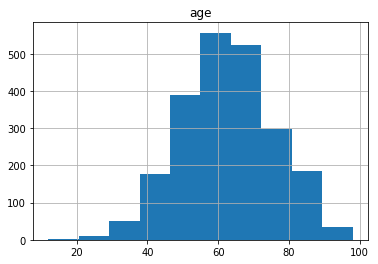

In [18]:
df[['age']].hist()

In [ ]:
std = 13.1 years

In [19]:
df[['age']].describe()

,age
count,2229.000000
mean,62.576492
std,13.134715
min,12.000000
25%,53.000000
50%,62.000000
75%,72.000000
max,98.000000


In [20]:
scaled = std.fit_transform(df[['age']].dropna())[:5]



# std.fit_transform(X, y=None, **fit_params)
# Fits transformer to X and y with optional parameters fit_params
# and returns a transformed version of X.

# Parameters
# ----------
# X : numpy array of shape [n_samples, n_features]
#     Training set.

# y : numpy array of shape [n_samples]
#     Target values.


In [21]:
scaled

array([[-2.1761343 ],
       [-0.27235416],
       [-0.12005174],
       [ 0.26070429],
       [-3.85146083]])

In [23]:
df['age'].dropna().values[:5]

array([34., 59., 61., 66., 12.])

Now we have some negative ages!

## One final note

The preprocessing steps are incredibly important and can be even more important than the algorithm itself. One should really think of the above as part of the machine learning algorithm itself. And this mentality will help a great deal. 

In fact you will need to train the above on your training data!

## Learning Objectives

This should be another short one, but we need to go ahead and do this. I have shown you how to transform qualitative features into quantitative ones, and this is quite useful for computing summary statistics, doing bootstrap and making visualizations, but now we are starting to be interested in prediction. For this we will need to do a slightly different feature transformaiton for qualitative variables and we will need to do some cleaning of quantitative variables too. These steps are outlines below:

1. Dummy variable drop one
2. Impute or drop Nans
3. Standardization

Again, before I go on, the above steps are not a complete list of what you could do and are not always needed, which is why I'll try to give some intuition into why we do them and what else can be done:

## Comprehension Questions

1.	Can other features in your dataset be completely correlated with each other? How can you tell?
    - Dummy Variables can be completely correlated to each other
    - The presence or absence of one indicates the presence of absence of the other
    
2.	Where do NaNs come from?
    - It could meean 0
    - OR it could be a missing data point

3.	When does imputing the mean/median not make sense?
    - When the NaN actually has a numeric or contextual meaning
 
4.	What else can you do other than impute values in columns that have missing data?
    - Drop
    - Use common sense

5.	Which algorithms might you not want standardization?
    - Maybe in a dataset that doesn't have a lot of variation

6.	Why would standardization help ML algorithms?
    - Standardization takes away the weight of outliers in the final function
